In [1]:
import numpy as np 
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import functions as myfunc
import warnings
warnings.filterwarnings(action='ignore')

def save_pickle(data_name, data):
    with open(data_name, 'wb') as f:
        pickle.dump(data, f)
        
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HANBatang.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)        

rawdata = pd.read_csv("2016_housemasterdata.csv" , encoding = 'CP949')

main_variable = ["MD제공용_가구고유번호", "수도권여부" , "가구주_성별코드", "가구주_교육정도_학력코드" , "가구주_만연령" , "가구원수","가구주_혼인상태코드" , "가구주_종사상지위코드", '경상소득(조사)', "경상소득_근로소득(조사)" , "경상소득_사업소득(조사)", "경상소득_재산소득(조사)" ,"경상소득_이전소득(조사)[공적이전소득+사적이전소득]" , "지출(조사)[비소비지출(조사)+소비지출(조사)](2012~2018년: 복지, 2019년~:공통)" ,
                 "지출_소비지출", "지출_소비지출_식료품(외식비포함)" ,"지출_소비지출_주거비", "지출_소비지출_교육비(보육료포함)", "지출_소비지출_의료비", "지출_소비지출_교통비", "지출_소비지출_통신비", "지출_소비지출_경조비및기타소비지출(2016년까지)" ,
                 "지출_비소비지출(조사)" , "지출_비소비지출_세금(조사)" , "지출_비소비지출_공적연금사회보험료(조사)" , "지출_비소비지출_가구간이전지출(조사)" , "지출_비소비지출_비영리단체이전지출(조사)" , "지출_비소비지출_연간지급이자(조사)"]

main_variable_ko = ["id", "수도권여부" , "가구주_성별코드", "교육정도", "만연령","가구원수" ,"혼인상태" ,
                    "가구주종사직업","총소득", "근로소득" , "사업소득", "재산소득" , "이전소득" , "총지출" ,
                    "소비지출", "식료품", "주거비", "교육비", "의료비", "교통비", "통신비", 
                    "기타소비" , "비소비지출" ,"세금" , "공적연금사회보험료" , "가구간이전지출" , "비영리단체이전지출" , "연간지급이자"]

main_variable_en = ["id", "metro", "sex", "edu", "age", "family_number" , "marital status" , 
                    "housemaster_job" , "income", "income_lab", "income_bis", "income_property", "income_trans", "all_consump" ,
                    "consump", "consump_food", "consump_house", "consump_edu", "consump_medi", "consump_transp", "consump_comm", 
                    "consump_others" , "nonconsump" ,"nonconsump_tax" , "nonconsump_pension" , "nonconsump_transfer" , "nonconsump_organization" , "nonconsump_interest"]

main_variable_en_consump = ["all_consump" ,"consump", "consump_food", "consump_house", "consump_edu", "consump_medi", 
                            "consump_transp", "consump_comm", "consump_others"]

dict_var = myfunc.make_dict(main_variable_en, main_variable_ko)
dict_sex = {'1':'M', '2':'F'}
dict_edu = {'1':'안받음', '2':'초등', '3': '중등', '4': '고등', '5':'대학', '6':'대학교', '7':'대학원'}
dict_marry = {'1' : '미혼' , '2' : '배우자있음' , '3' : '사별' , '4': '이혼'}
dict_housejob = {'1' : '상용근로자', '2' : '임시.일용근로자', '3' : '고용원이 있는 자영업자', '4' : '고용원이 없는 자영업자', '5' : '무급가족종사자', '6' : '기타 종사자(실적급의 보험설계사, 대리 운전기사, 학습지 방문 교사 등)', '7' : '기타(무직자, 가사, 학생 등)'}

dict_familynumber = {}
for i in range(1, 10):
    dict_familynumber[str(i)] = f'{i}명' # 범주형으로 표현하기 위해

all_oridata = rawdata.loc[rawdata['조사부문코드'] == "P", [ '조사부문코드'] + main_variable] # 복지부문 , 금융부문에서 복지부분만 추출하기 위해 
all_oridata.drop(columns=['조사부문코드'], inplace=True)
all_oridata.columns = main_variable_en

final_data = myfunc.convert_int(all_oridata, main_variable_en_consump) # 데이터 int형식으로 바꾸기 
final_data = myfunc.convert_int_to_str(final_data, ['sex', 'edu' ,'marital status', 'housemaster_job' , 'family_number']) # 해당 범주는 str형식으로 바꾸기 

myfunc.change_contents(final_data, 'sex', dict_sex)
myfunc.change_contents(final_data, 'edu', dict_edu)
myfunc.change_contents(final_data, 'marital status', dict_marry)
myfunc.change_contents(final_data, 'housemaster_job', dict_housejob)
myfunc.change_contents(final_data, 'family_number', dict_familynumber)

# final_data['metro'] = final_data['metro'].str.replace('G','')

,id,metro,sex,edu,age,family_number,marital status,housemaster_job,income,income_lab,...,consump_medi,consump_transp,consump_comm,consump_others,nonconsump,nonconsump_tax,nonconsump_pension,nonconsump_transfer,nonconsump_organization,nonconsump_interest
2,10200151,G1,F,대학교,53,3명,배우자있음,상용근로자,12600,12600,...,200,430,310,1300,1896,981,725,0,0,190
3,10200161,G1,M,대학,46,5명,배우자있음,고용원이 있는 자영업자,4560,0,...,36,120,240,380,1589,86,636,0,0,867
4,10200171,G1,M,대학교,36,2명,배우자있음,상용근로자,12420,12420,...,35,700,120,800,2759,515,818,200,136,1090
5,10200191,G1,F,안받음,80,1명,사별,임시.일용근로자,612,160,...,92,10,36,40,9,1,0,0,8,0
6,10200211,G2,M,대학,57,4명,배우자있음,고용원이 없는 자영업자,10800,0,...,100,36,480,230,1137,161,756,0,150,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18249,991600301,G2,M,안받음,86,1명,사별,"기타(무직자, 가사, 학생 등)",240,0,...,50,30,30,40,1,1,0,0,0,0
18269,994200381,G2,F,안받음,84,1명,사별,"기타(무직자, 가사, 학생 등)",288,0,...,30,20,10,10,11,1,10,0,0,0
18270,994505311,G2,M,대학,41,5명,배우자있음,상용근로자,4540,4500,...,200,400,240,500,593,82,331,0,0,180
18271,994505321,G2,M,초등,54,4명,배우자있음,상용근로자,2160,2160,...,0,100,72,300,1,1,0,0,0,0


In [2]:
from rdt import HyperTransformer
from rdt.transformers.numerical import GaussianNormalizer
from rdt.transformers.categorical import LabelEncoder
from rdt.transformers.numerical import FloatFormatter
from rdt.transformers.categorical import FrequencyEncoder
from rdt.transformers.numerical import ClusterBasedNormalizer

In [3]:
ht = HyperTransformer()

In [4]:
ht.detect_initial_config(data=final_data)

In [5]:
ht.get_config()

{
    "sdtypes": {
        "id": "numerical",
        "metro": "categorical",
        "sex": "categorical",
        "edu": "categorical",
        "age": "numerical",
        "family_number": "categorical",
        "marital status": "categorical",
        "housemaster_job": "categorical",
        "income": "numerical",
        "income_lab": "numerical",
        "income_bis": "numerical",
        "income_property": "numerical",
        "income_trans": "numerical",
        "all_consump": "numerical",
        "consump": "numerical",
        "consump_food": "numerical",
        "consump_house": "numerical",
        "consump_edu": "numerical",
        "consump_medi": "numerical",
        "consump_transp": "numerical",
        "consump_comm": "numerical",
        "consump_others": "numerical",
        "nonconsump": "numerical",
        "nonconsump_tax": "numerical",
        "nonconsump_pension": "numerical",
        "nonconsump_transfer": "numerical",
        "nonconsump_organization": "numer

In [6]:
ht.set_config(config = {
    "sdtypes": {
        "id": "numerical",
        "metro": "categorical",
        "sex": "categorical",
        "edu": "categorical",
        "age": "numerical",
        "family_number": "categorical",
        "marital status": "categorical",
        "housemaster_job": "categorical",
        "income": "numerical",
        "income_lab": "numerical",
        "income_bis": "numerical",
        "income_property": "numerical",
        "income_trans": "numerical",
        "all_consump": "numerical",
        "consump": "numerical",
        "consump_food": "numerical",
        "consump_house": "numerical",
        "consump_edu": "numerical",
        "consump_medi": "numerical",
        "consump_transp": "numerical",
        "consump_comm": "numerical",
        "consump_others": "numerical",
        "nonconsump": "numerical",
        "nonconsump_tax": "numerical",
        "nonconsump_pension": "numerical",
        "nonconsump_transfer": "numerical",
        "nonconsump_organization": "numerical",
        "nonconsump_interest": "numerical"
    },
    "transformers": {
        "id": FloatFormatter(),
        "metro": FrequencyEncoder(),
        "sex": FrequencyEncoder(),
        "edu": FrequencyEncoder(),
        "age": FloatFormatter(),
        "family_number": FrequencyEncoder(),
        "marital status": FrequencyEncoder(),
        "housemaster_job": FrequencyEncoder(),
        "income": ClusterBasedNormalizer(),
        "income_lab": ClusterBasedNormalizer(max_clusters = 2),
        "income_bis": ClusterBasedNormalizer(),
        "income_property": ClusterBasedNormalizer(),
        "income_trans": ClusterBasedNormalizer(),
        "all_consump": ClusterBasedNormalizer(),
        "consump": ClusterBasedNormalizer(),
        "consump_food": ClusterBasedNormalizer(max_clusters = 2),
        "consump_house": ClusterBasedNormalizer(),
        "consump_edu": ClusterBasedNormalizer(),
        "consump_medi": ClusterBasedNormalizer(),
        "consump_transp": ClusterBasedNormalizer(),
        "consump_comm": ClusterBasedNormalizer(),
        "consump_others": ClusterBasedNormalizer(),
        "nonconsump": ClusterBasedNormalizer(),
        "nonconsump_tax": ClusterBasedNormalizer(max_clusters = 2),
        "nonconsump_pension": ClusterBasedNormalizer(),
        "nonconsump_transfer": ClusterBasedNormalizer(),
        "nonconsump_organization": ClusterBasedNormalizer(),
        "nonconsump_interest": ClusterBasedNormalizer()
    }
})

In [13]:
ht.fit(final_data)
transformed_data = ht.fit_transform(final_data)

In [14]:
transformed_data.to_csv("cluster_transformed_data.csv" , index= False)

CTGAN

In [4]:
from sdv.tabular import CTGAN

In [5]:
transformed_data = pd.read_csv("cluster_transformed_data.csv" , encoding = 'CP949')

In [6]:
model = CTGAN(epochs = 600 , batch_size = 300 , verbose = True)
model.fit(transformed_data)
synthetic_data = model.sample(len(transformed_data))

Epoch 1, Loss G: -0.1779,Loss D: -0.6598
Epoch 2, Loss G: -0.5329,Loss D:  0.5260
Epoch 3, Loss G:  0.1957,Loss D: -0.0183
Epoch 4, Loss G: -1.4088,Loss D:  0.2557
Epoch 5, Loss G: -1.9602,Loss D:  0.1015
Epoch 6, Loss G: -1.0626,Loss D: -0.1780
Epoch 7, Loss G: -1.7206,Loss D:  0.0187
Epoch 8, Loss G: -1.8701,Loss D:  0.3087
Epoch 9, Loss G: -1.5524,Loss D: -0.0486
Epoch 10, Loss G: -2.7636,Loss D: -0.0777
Epoch 11, Loss G: -2.6979,Loss D: -0.1999
Epoch 12, Loss G: -3.1510,Loss D: -0.3210
Epoch 13, Loss G: -2.9238,Loss D:  0.1108
Epoch 14, Loss G: -3.0649,Loss D: -0.1670
Epoch 15, Loss G: -3.3482,Loss D:  0.2850
Epoch 16, Loss G: -3.2499,Loss D:  0.1685
Epoch 17, Loss G: -3.1726,Loss D:  0.1458
Epoch 18, Loss G: -3.1534,Loss D:  0.1207
Epoch 19, Loss G: -2.6344,Loss D:  0.0413
Epoch 20, Loss G: -3.5322,Loss D: -0.1504
Epoch 21, Loss G: -2.4887,Loss D: -0.6647
Epoch 22, Loss G: -3.5805,Loss D: -0.0464
Epoch 23, Loss G: -3.1588,Loss D: -0.3708
Epoch 24, Loss G: -3.5558,Loss D: -0.1531
E

In [8]:
synthetic_data.to_csv("cluster_syn_transformed_data.csv" , index = False)

Retransform

In [8]:
transformed_data = pd.read_csv("cluster_syn_transformed_data.csv" , encoding = 'CP949')

In [9]:
ht.fit(final_data)
retransformed_data = ht.reverse_transform(transformed_data)

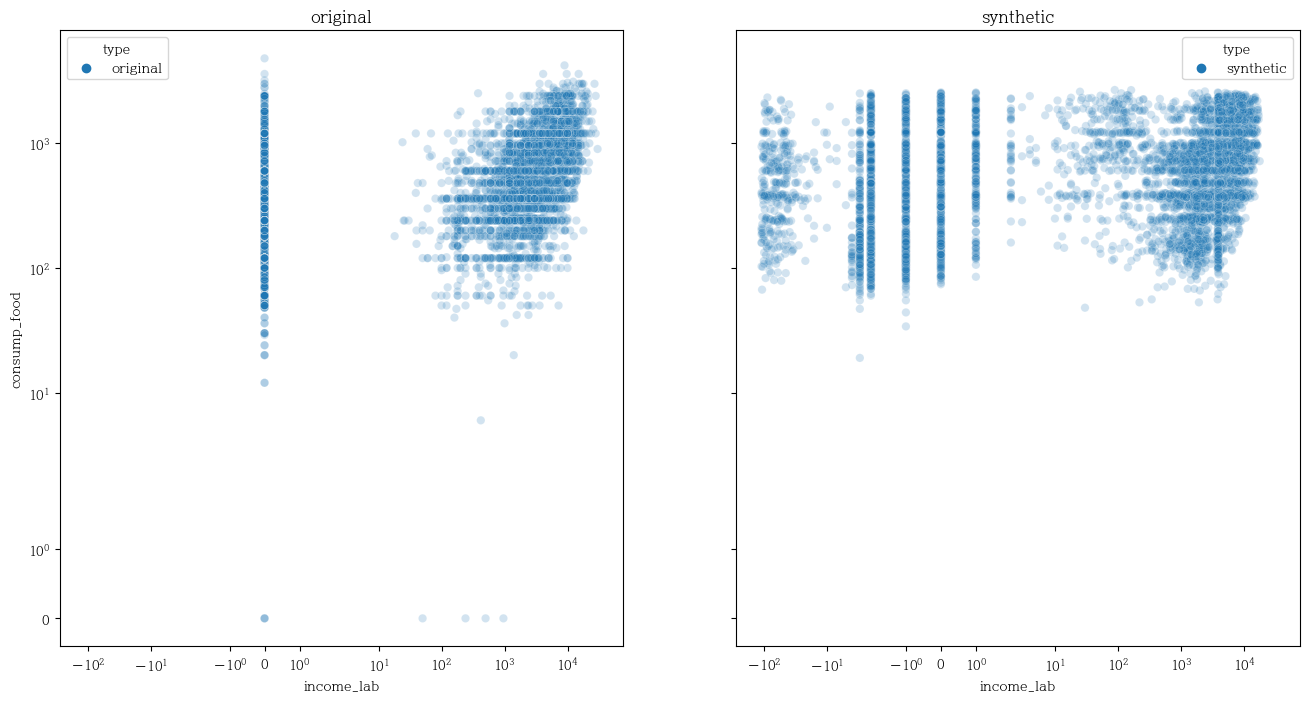

In [12]:
a = final_data.copy()
b = retransformed_data.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[1],  'type', ['original','synthetic'], train_vars[0],train_vars[1], 'Scenario1_1.png')

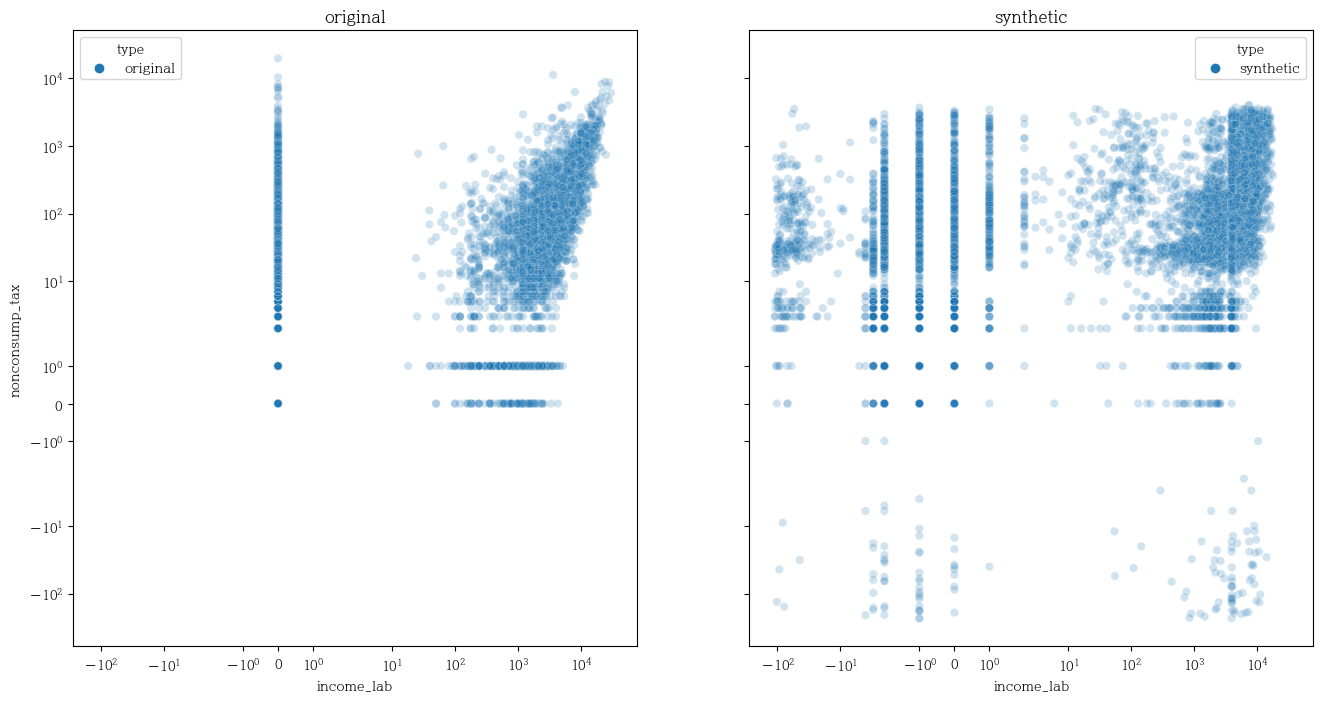

In [13]:
a = final_data.copy()
b = retransformed_data.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[2],  'type', ['original','synthetic'], train_vars[0],train_vars[2], 'Scenario1_1.png')

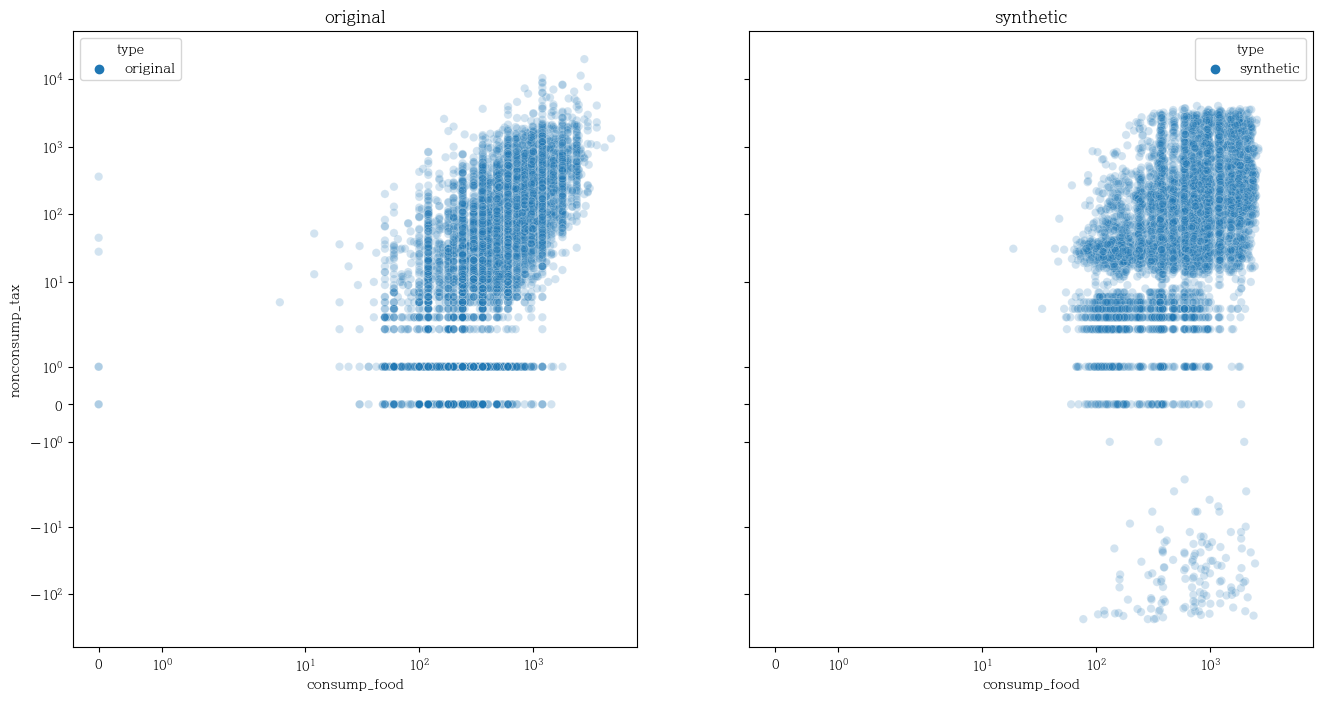

In [14]:
a = final_data.copy()
b = retransformed_data.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[1],train_vars[2],  'type', ['original','synthetic'], train_vars[1],train_vars[2], 'Scenario1_1.png')